# Support Vector Regression (SVR)

## Importing the libraries

In [69]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler #Feature Scaling

from sklearn.svm import SVR #Build SVR model



## Importing the dataset

In [70]:
dataset = pd.read_csv('Position_Salaries.csv')
dataset.head(3)

X=dataset.iloc[:,1:-1].values
y=dataset.iloc[:,-1].values




In [71]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [72]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [73]:
y = y.reshape(y.shape[0],1) #coluna 1 reshape StandardScaler 2 D array as input
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

In [74]:
# y= np.expand_dims(y,axis=0)
# y

## Feature Scaling

In [75]:
sc_X= StandardScaler()  #[-3,3]
sc_y= StandardScaler()

X= sc_X.fit_transform(X)  #mean and sd of X

y= sc_y.fit_transform(y) #mean and sd of y

In [76]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [77]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

## Training the SVR model on the whole dataset

In [78]:
regressor = SVR(kernel='rbf') #kernels linear or non linear
regressor.fit(X,y)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [81]:
# sc_y.inverse_transform(regressor.predict(sc_X([[6.5]])).reshape(-1,1))       #SCALED Values returning to normal.  #reshape avoid format error

sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))


array([[170370.0204065]])

In [82]:
sc_y_inv = sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)) #predict method on scalled values

## Visualising the SVR results

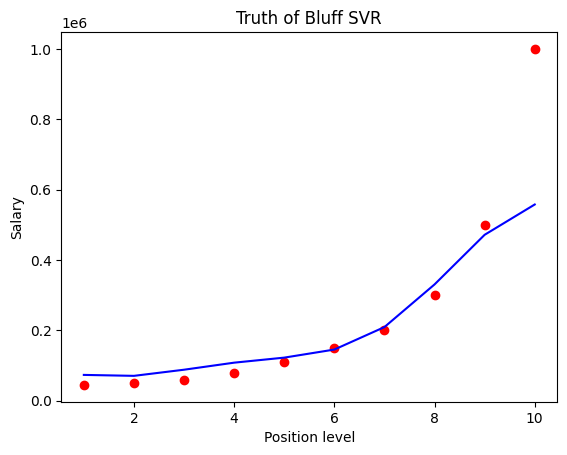

In [84]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color='red')

plt.plot(sc_X.inverse_transform(X),sc_y_inv,color='blue')


plt.title('Truth of Bluff SVR')
plt.xlabel('Position level')
plt.ylabel('Salary')

plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)

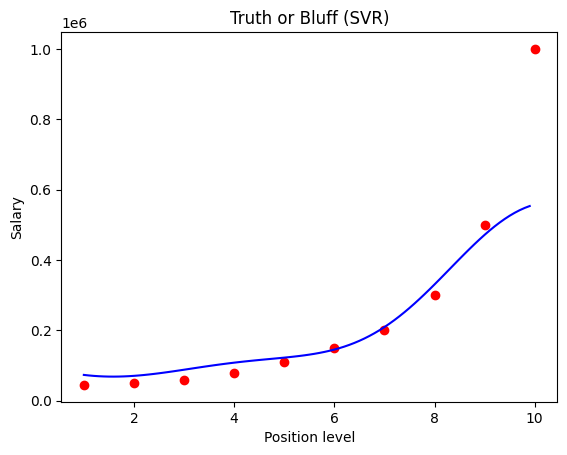

In [88]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')

plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()